In [ ]:
# essentials
import pandas as pd
import numpy as np

# models and training
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# visualization
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import plot_tree
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve 

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [ ]:
# plot_learning_curve taken from sklearn site
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

    

In [ ]:
labels = pd.read_csv("./labels.csv")
melMFCC = pd.read_csv("./melMFCC (3).csv")
cwt = pd.read_csv("./cwt (1).csv")
spectrum = pd.read_csv("./spectrum (3).csv")
zcrossRMS = pd.read_csv("./zcrossRMS.csv")
data = pd.concat([melMFCC, cwt, spectrum, zcrossRMS, labels], axis=1)

In [ ]:
data.head()
data.columns

Index(['mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_3', 'mfcc_mean_4',
       'mfcc_mean_5', 'mfcc_mean_6', 'mfcc_mean_7', 'mfcc_mean_8',
       'mfcc_mean_9', 'mfcc_mean_10',
       ...
       'chroma_stft_std_7', 'chroma_stft_std_8', 'chroma_stft_std_9',
       'chroma_stft_std_10', 'chroma_stft_std_11', 'chroma_stft_std_12',
       'num_zerocrossings', 'zerocrossing_rate', 'ppe', '1'],
      dtype='object', length=5723)

In [ ]:
dataset = data.drop(["Unnamed: 1"], axis = 1)
dataset = data.rename(columns = {"1": "label"})
dataset

,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_std_1,mfcc_std_2,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,mfcc_skewness_1,mfcc_skewness_2,mfcc_skewness_3,mfcc_skewness_4,mfcc_skewness_5,mfcc_skewness_6,mfcc_skewness_7,mfcc_skewness_8,mfcc_skewness_9,mfcc_skewness_10,mfcc_skewness_11,mfcc_skewness_12,mfcc_skewness_13,mfcc_kurtosis_1,...,magnitude_spectrum_q3_q1_range_1016,magnitude_spectrum_q3_q1_range_1017,magnitude_spectrum_q3_q1_range_1018,magnitude_spectrum_q3_q1_range_1019,magnitude_spectrum_q3_q1_range_1020,magnitude_spectrum_q3_q1_range_1021,magnitude_spectrum_q3_q1_range_1022,magnitude_spectrum_q3_q1_range_1023,magnitude_spectrum_q3_q1_range_1024,magnitude_spectrum_q3_q1_range_1025,rms_mean,rms_std,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_12,chroma_stft_std_1,chroma_stft_std_2,chroma_stft_std_3,chroma_stft_std_4,chroma_stft_std_5,chroma_stft_std_6,chroma_stft_std_7,chroma_stft_std_8,chroma_stft_std_9,chroma_stft_std_10,chroma_stft_std_11,chroma_stft_std_12,num_zerocrossings,zerocrossing_rate,ppe,label
0,-264.70697,146.553040,-53.988422,38.241710,-18.107672,1.262519,-8.907472,-3.495860,-3.348850,-13.717752,-2.354959,-13.309593,0.721483,75.880470,24.630238,26.308706,20.965816,16.598482,14.767415,11.115883,9.696853,8.466570,9.415100,7.668916,8.435297,8.683735,-1.614468,-1.946613,0.701827,-0.197073,0.081229,-0.289590,0.159990,0.257958,-0.121656,0.192456,-0.097796,-0.047384,0.120798,3.977375,...,0.000110,0.000111,0.000111,0.000112,0.000112,0.000111,0.000112,0.000111,0.000111,0.000144,0.267097,0.068846,0.387060,0.415682,0.443654,0.370297,0.466855,0.398182,0.329400,0.335886,0.285538,0.409712,0.330687,0.336894,0.306641,0.289088,0.316087,0.234476,0.330540,0.307841,0.251353,0.305382,0.222246,0.336546,0.282412,0.256416,661783,0.068267,3.988275,1
1,-210.22163,155.482000,-18.910133,27.101187,-17.921206,12.761443,-10.366790,1.718788,-9.243760,-3.804808,-2.195718,-4.743312,-5.376245,80.341040,31.776777,26.947664,18.020601,19.357666,14.398563,13.872361,10.601998,10.544689,9.368545,9.158636,8.731867,9.623793,-1.352080,-1.345965,0.866858,0.029227,-0.460116,0.103754,-0.066846,0.099288,0.238898,-0.196628,0.074335,-0.047137,-0.092540,2.265101,...,0.000114,0.000112,0.000114,0.000111,0.000114,0.000113,0.000112,0.000114,0.000114,0.000147,0.213107,0.083264,0.416712,0.393482,0.414416,0.389021,0.455869,0.414640,0.392650,0.416561,0.454482,0.613764,0.593949,0.502441,0.284841,0.270706,0.289254,0.249865,0.278406,0.257111,0.252640,0.276815,0.265025,0.326958,0.296366,0.285547,1447111,0.138466,9.606742,1
2,-170.76405,167.018690,-22.749548,19.926897,-19.093473,4.898806,-10.124193,4.973804,-0.454848,-1.701703,-0.668343,1.221411,1.788229,62.637943,24.370584,20.049290,16.995075,17.061861,12.562091,13.128664,9.871306,10.012965,8.811901,8.092409,8.939853,10.231697,-1.860226,-2.542458,0.963058,-0.093565,-0.192981,0.253787,-0.186717,0.378558,0.296077,0.033346,0.309666,0.094419,-0.005484,5.752027,...,0.000116,0.000115,0.000116,0.000116,0.000115,0.000114,0.000121,0.000117,0.000117,0.000150,0.212831,0.069944,0.261051,0.213400,0.317444,0.324994,0.263051,0.435874,0.392012,0.269026,0.263223,0.363308,0.530138,0.451977,0.229639,0.214151,0.285369,0.277733,0.209780,0.310931,0.296488,0.248110,0.265125,0.273340,0.348938,0.338530,1101623,0.092492,-2.355303,1
3,-152.55112,139.953660,5.233677,34.280575,-21.317423,16.546442,-16.107943,11.985446,-14.879821,-1.199546,-11.632706,1.692784,-2.354979,119.228580,55.441097,23.139595,33.642353,19.260246,14.460542,11.892440,14.148216,12.828374,9.768983,10.950883,9.287644,9.561971,-1.659828,-0.563345,0.005913,-0.914853,0.040396,0.180884,0.085880,-0.055781,

In [ ]:
labels = dataset["label"]
dataset.drop(["label"],axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(dataset, labels)

In [ ]:
X_train

,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_std_1,mfcc_std_2,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,mfcc_skewness_1,mfcc_skewness_2,mfcc_skewness_3,mfcc_skewness_4,mfcc_skewness_5,mfcc_skewness_6,mfcc_skewness_7,mfcc_skewness_8,mfcc_skewness_9,mfcc_skewness_10,mfcc_skewness_11,mfcc_skewness_12,mfcc_skewness_13,mfcc_kurtosis_1,...,magnitude_spectrum_q3_q1_range_1015,magnitude_spectrum_q3_q1_range_1016,magnitude_spectrum_q3_q1_range_1017,magnitude_spectrum_q3_q1_range_1018,magnitude_spectrum_q3_q1_range_1019,magnitude_spectrum_q3_q1_range_1020,magnitude_spectrum_q3_q1_range_1021,magnitude_spectrum_q3_q1_range_1022,magnitude_spectrum_q3_q1_range_1023,magnitude_spectrum_q3_q1_range_1024,magnitude_spectrum_q3_q1_range_1025,rms_mean,rms_std,chroma_stft_mean_1,chroma_stft_mean_2,chroma_stft_mean_3,chroma_stft_mean_4,chroma_stft_mean_5,chroma_stft_mean_6,chroma_stft_mean_7,chroma_stft_mean_8,chroma_stft_mean_9,chroma_stft_mean_10,chroma_stft_mean_11,chroma_stft_mean_12,chroma_stft_std_1,chroma_stft_std_2,chroma_stft_std_3,chroma_stft_std_4,chroma_stft_std_5,chroma_stft_std_6,chroma_stft_std_7,chroma_stft_std_8,chroma_stft_std_9,chroma_stft_std_10,chroma_stft_std_11,chroma_stft_std_12,num_zerocrossings,zerocrossing_rate,ppe
1341,-302.024380,232.179200,6.051543,-18.526844,42.722404,18.295261,-18.517052,0.875039,6.807413,-13.424997,-6.085082,9.006515,-1.690921,26.951122,23.288425,14.985821,17.754578,15.215030,10.802603,9.909559,10.720439,7.524661,7.825985,8.672895,8.564547,8.782585,-1.714994,-1.582897,0.436634,0.416774,0.169149,-0.287017,0.102078,0.217827,-0.052081,0.214460,0.065751,-0.048678,0.319943,11.742811,...,7.870000e-07,8.170000e-07,8.100000e-07,8.070000e-07,7.740000e-07,7.690000e-07,7.410000e-07,7.720000e-07,7.980000e-07,8.750000e-07,0.000001,0.252288,0.118886,0.438705,0.399699,0.451632,0.400962,0.403895,0.383226,0.342792,0.389899,0.409447,0.537963,0.441715,0.381886,0.350061,0.295319,0.349379,0.298328,0.291076,0.302102,0.258589,0.306152,0.272318,0.347759,0.310821,0.282236,476171,0.056919,11.150045
56,-116.796135,67.456760,-63.063280,71.579400,-34.416230,27.576181,-9.137722,18.103142,-5.887897,12.356257,-3.547609,3.285296,9.108284,53.262710,25.905645,21.064362,15.511869,18.091950,15.355278,13.305960,11.632507,11.029650,8.932516,10.572915,11.466513,12.621991,-2.148219,0.030017,-0.051899,-0.017212,0.974485,-0.223417,-0.110001,-0.715012,0.285484,-0.045686,0.998134,0.814569,1.097671,10.360866,...,1.168200e-04,1.175530e-04,1.186530e-04,1.167110e-04,1.160790e-04,1.206810e-04,1.413560e-04,1.804250e-04,1.789980e-04,1.250280e-04,0.000151,0.130790,0.079010,0.411311,0.264426,0.364355,0.308080,0.210978,0.260946,0.235167,0.341057,0.346528,0.351255,0.379879,0.339779,0.368651,0.225513,0.344544,0.304501,0.200382,0.297014,0.213456,0.333344,0.335168,0.307276,0.333543,0.273743,436985,0.045735,-3.655571
87,-258.328830,141.743880,-16.977022,14.026022,7.951721,7.856566,-8.421592,3.307436,-15.142348,-9.278913,-9.129325,5.171215,-1.223848,63.841080,23.713160,37.985523,16.480110,13.951825,14.729385,10.002635,9.355432,8.359120,8.264560,8.516369,9.004370,12.183793,-0.192155,-0.734332,0.406839,0.379905,-0.585123,-0.176591,0.207582,0.196736,-0.230426,0.088178,-0.136956,0.050738,0.335364,-0.425587,...,1.097470e-04,1.118010e-04,1.128730e-04,1.109230e-04,1.105560e-04,1.134010e-04,1.140540e-04,1.142980e-04,1.125040e-04,1.126090e-04,0.000144,0.259332,0.093030,0.433070,0.407884,0.307688,0.282851,0.227039,0.288273,0.229187,0.372540,0.400450,0.245889,0.209917,0.263550,0.367362,0.354400,0.256379,0.316482,0.241593,0.359345,0.219924,0.337713,0.338731,0.234944,0.243099,0.225062,577847,0.067702,-5.451699
778,-132.839170,108.168880,-18.838602,47.562717,-20.646473,28.674023,-15.899450,12.504084,-7.344947,8.484492,-5.628545,4.786885,-3.678604,65.663030,28.679575,20.3642

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)
X_train[:] = imputer.transform(X_train)
X_test[:] = imputer.transform(X_test)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standard =  scaler.transform(X_train)
X_test_standard =  scaler.transform(X_test)


In [ ]:
X_train_standard.shape

(1034, 5722)

# Using Wrapper Method To select a subset from Features

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.03, penalty="l2", dual=False).fit(X_train_standard,y_train)
model = SelectFromModel(lsvc, prefit=True)
X_selected_train_bySVC = model.transform(X_train_standard)
X_selected_test_bySVC = model.transform(X_test_standard)

In [ ]:
X_selected_train_bySVC.shape

(1034, 1044)

2265 Features has been selected with SFM, the classifier selected to be our objective function is SVM.

## XGBoost Classifier 

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(clf, num_trees=5, ax=ax)
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

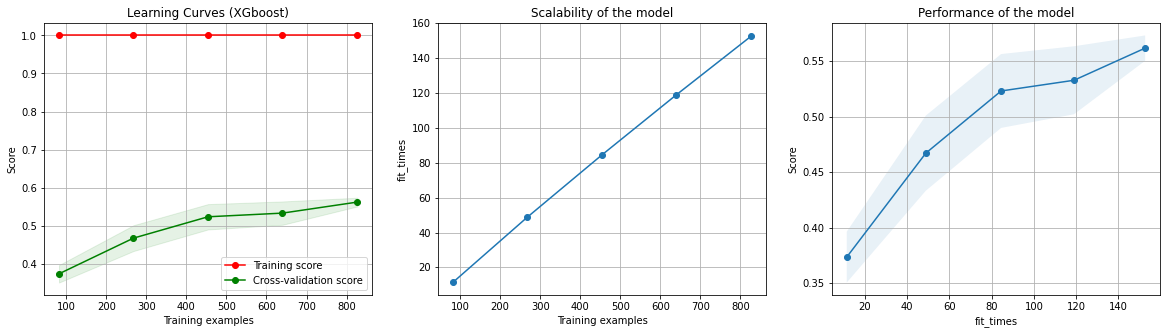

In [ ]:
from xgboost import XGBClassifier
title = "Learning Curves (XGboost)"

plot_learning_curve(
    XGBClassifier(), title, X_train, y_train
)

### Results

In [ ]:
print("Accuracy of XGBoost")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of XGBoost
Accuracy for the Test:  0.6869565217391305
Accuracy for the Train:  1.0
              precision    recall  f1-score   support

        Lori       0.92      1.00      0.96        68
       Kordi       0.52      0.45      0.48        66
       Torki       0.59      0.58      0.59        77
     Bandari       0.71      0.78      0.74        67
      Gilaki       0.66      0.63      0.64        67

    accuracy                           0.69       345
   macro avg       0.68      0.69      0.68       345
weighted avg       0.68      0.69      0.68       345



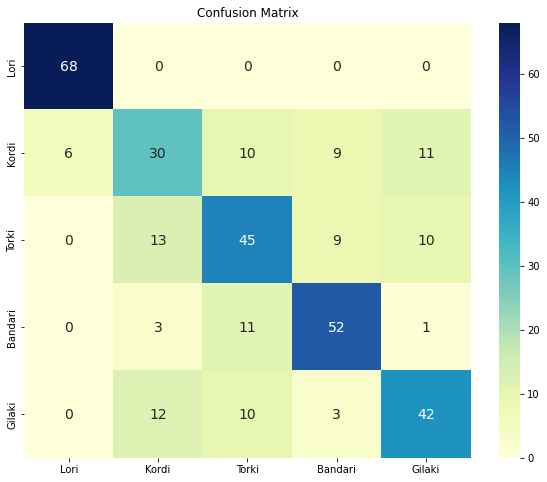

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

## XGBoost With selected features with Wrapper Method

In [ ]:
clf.fit(X_selected_train_bySVC, y_train)
y_pred = clf.predict(X_selected_test_bySVC)
y_pred_train = clf.predict(X_selected_train_bySVC)


### Results

In [ ]:
print("Accuracy of XGBoost")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of XGBoost
Accuracy for the Test:  0.6753623188405797
Accuracy for the Train:  1.0
              precision    recall  f1-score   support

        Lori       0.92      0.97      0.94        68
       Kordi       0.53      0.45      0.49        66
       Torki       0.56      0.58      0.57        77
     Bandari       0.72      0.76      0.74        67
      Gilaki       0.63      0.61      0.62        67

    accuracy                           0.68       345
   macro avg       0.67      0.68      0.67       345
weighted avg       0.67      0.68      0.67       345



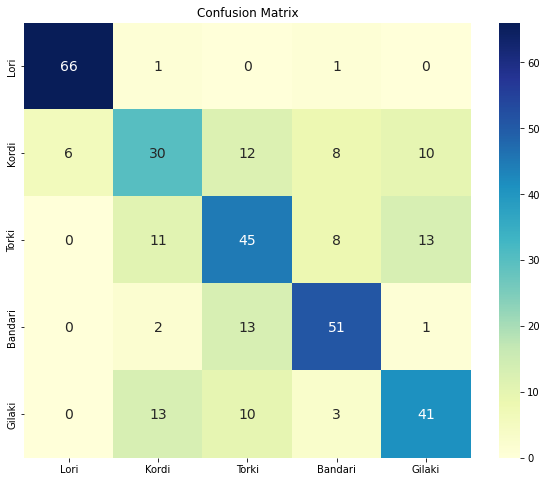

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

## SVM Classifier

SVM with Standardize Original Data

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_standard, y_train)
y_pred= clf.predict(X_test_standard)
y_pred_train = clf.predict(X_train_standard)

### Result

In [ ]:
print("Accuracy of SVM")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of SVM
Accuracy for the Test:  0.6260869565217392
Accuracy for the Train:  0.6470019342359767
              precision    recall  f1-score   support

        Lori       0.92      1.00      0.96        68
       Kordi       0.48      0.35      0.40        66
       Torki       0.48      0.60      0.53        77
     Bandari       0.60      0.76      0.67        67
      Gilaki       0.65      0.42      0.51        67

    accuracy                           0.63       345
   macro avg       0.63      0.62      0.62       345
weighted avg       0.62      0.63      0.61       345



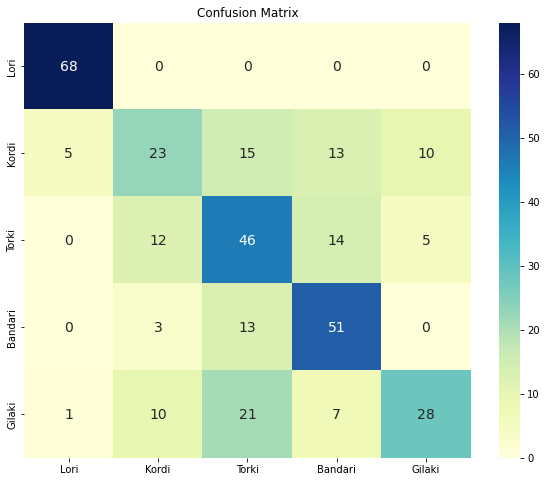

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

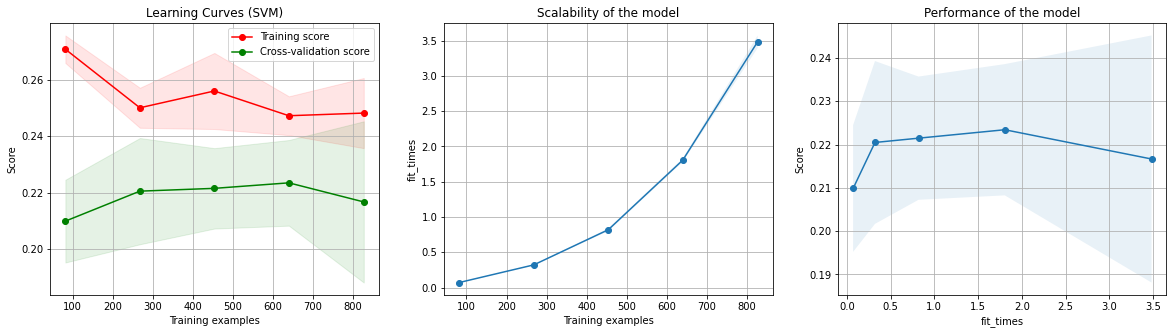

In [ ]:
from sklearn import svm
title = "Learning Curves (SVM)"
clf = svm.SVC()

plot_learning_curve(
    clf, title, X_train, y_train
)

## SVM With Wrapper Method Extracted Features

In [ ]:
clf.fit(X_selected_train_bySVC, y_train)
y_pred= clf.predict(X_selected_test_bySVC)
y_pred_train = clf.predict(X_selected_train_bySVC)

### Results

In [ ]:
print("Accuracy of SVM with Selected Features")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of SVM with Selected Features
Accuracy for the Test:  0.6753623188405797
Accuracy for the Train:  1.0
              precision    recall  f1-score   support

        Lori       0.92      0.97      0.94        68
       Kordi       0.53      0.45      0.49        66
       Torki       0.56      0.58      0.57        77
     Bandari       0.72      0.76      0.74        67
      Gilaki       0.63      0.61      0.62        67

    accuracy                           0.68       345
   macro avg       0.67      0.68      0.67       345
weighted avg       0.67      0.68      0.67       345



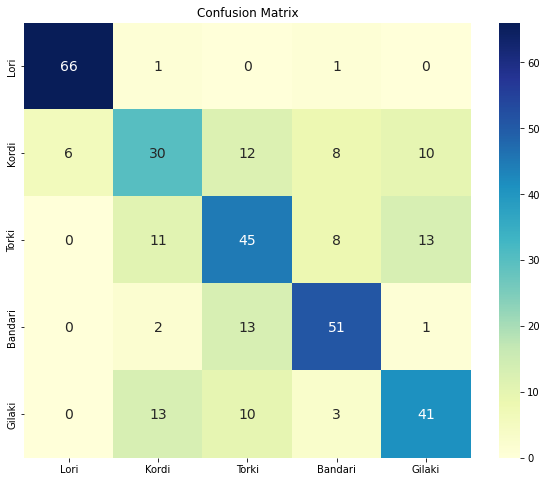

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='liblinear')
lm.fit(X_train_standard, y_train)
y_pred= lm.predict(X_test_standard)
y_pred_train = lm.predict(X_train_standard)

### Results

In [ ]:
print("Accuracy of Logistic Regression")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of SVM with Selected Features
Accuracy for the Test:  0.6347826086956522
Accuracy for the Train:  0.988394584139265
              precision    recall  f1-score   support

        Lori       0.90      0.79      0.84        68
       Kordi       0.51      0.50      0.50        66
       Torki       0.60      0.57      0.59        77
     Bandari       0.62      0.67      0.64        67
      Gilaki       0.58      0.64      0.61        67

    accuracy                           0.63       345
   macro avg       0.64      0.64      0.64       345
weighted avg       0.64      0.63      0.64       345



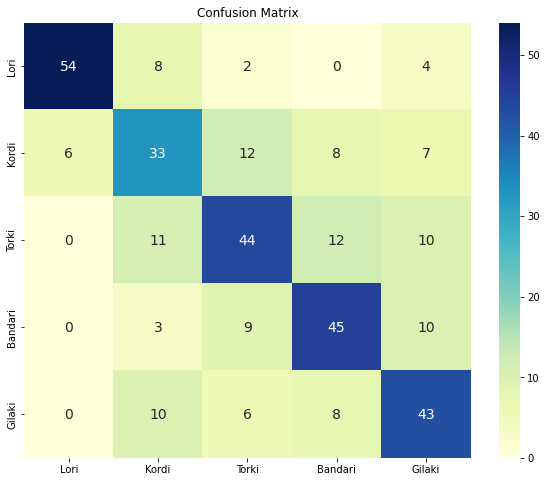

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

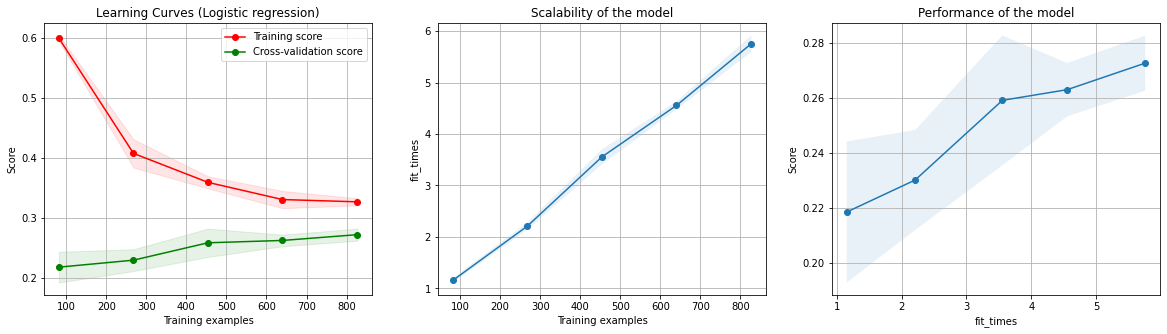

In [ ]:
from sklearn.linear_model import LogisticRegression
title = "Learning Curves (Logistic regression)"
clf = LogisticRegression()

plot_learning_curve(
    clf, title, X_train, y_train
)

## Logistic Regression with Selected Features

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='liblinear')
lm.fit(X_selected_train_bySVC, y_train)
y_pred= lm.predict(X_selected_test_bySVC)
y_pred_train = lm.predict(X_selected_train_bySVC)

### Result

In [ ]:
print("Accuracy of Logistic Regression with Selected Features")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of SVM with Selected Features
Accuracy for the Test:  0.6405797101449275
Accuracy for the Train:  0.988394584139265
              precision    recall  f1-score   support

        Lori       0.92      0.81      0.86        68
       Kordi       0.50      0.53      0.51        66
       Torki       0.61      0.57      0.59        77
     Bandari       0.62      0.67      0.64        67
      Gilaki       0.60      0.63      0.61        67

    accuracy                           0.64       345
   macro avg       0.65      0.64      0.64       345
weighted avg       0.65      0.64      0.64       345



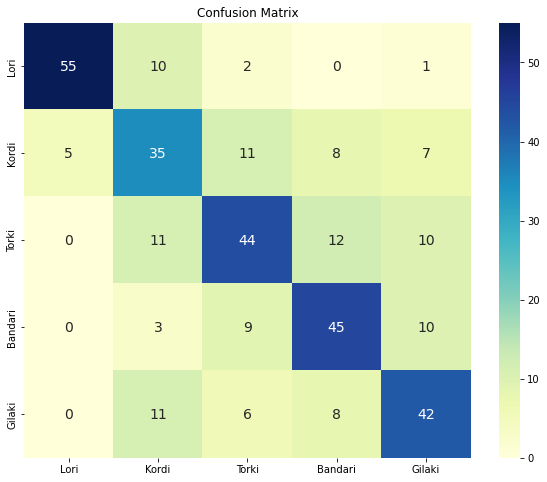

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

# Filter Methods:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
X_train_selectedPCA = pca.fit_transform(X_train_standard)
X_test_selectedPCA= pca.fit_transform(X_test_standard)

## SVM Using Features Selected With PCA

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_selectedPCA, y_train)
y_pred= clf.predict(X_test_selectedPCA)
y_pred_train = clf.predict(X_train_selectedPCA)

### Result

In [ ]:
print("Accuracy of SVM with PCA")
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of SVM with PCA
Accuracy for the Test:  0.4927536231884058
Accuracy for the Train:  0.6005802707930368
              precision    recall  f1-score   support

        Lori       0.91      0.99      0.94        68
       Kordi       0.31      0.32      0.31        66
       Torki       0.41      0.58      0.48        77
     Bandari       0.41      0.39      0.40        67
      Gilaki       0.38      0.16      0.23        67

    accuracy                           0.49       345
   macro avg       0.48      0.49      0.47       345
weighted avg       0.48      0.49      0.47       345



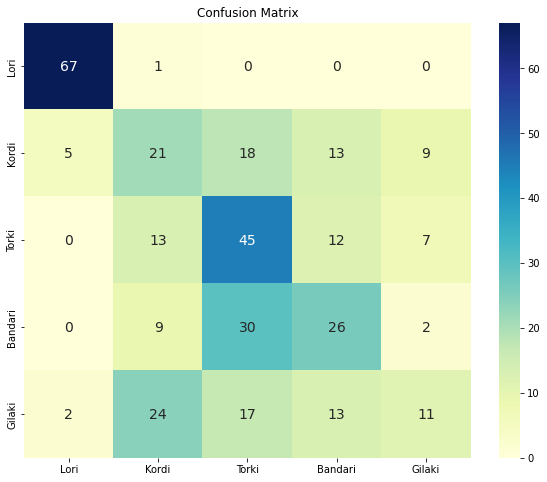

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);

## XGboost using Features Extracted With PCA

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train_selectedPCA, y_train)
y_pred = clf.predict(X_test_selectedPCA)
y_pred_train = clf.predict(X_train_selectedPCA)

### Result

In [ ]:
print("Accuracy of SVM with PCA") #Wrong Name it should be XGBoost!
print("Accuracy for the Test: ", accuracy_score(y_test, y_pred))
print("Accuracy for the Train: ", accuracy_score(y_pred_train, y_train))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,  target_names= ['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']) )

Accuracy of SVM with PCA
Accuracy for the Test:  0.2985507246376812
Accuracy for the Train:  0.9574468085106383
              precision    recall  f1-score   support

        Lori       0.32      0.97      0.49        68
       Kordi       0.28      0.39      0.33        66
       Torki       0.22      0.08      0.12        77
     Bandari       0.31      0.06      0.10        67
      Gilaki       0.14      0.01      0.03        67

    accuracy                           0.30       345
   macro avg       0.25      0.30      0.21       345
weighted avg       0.25      0.30      0.21       345



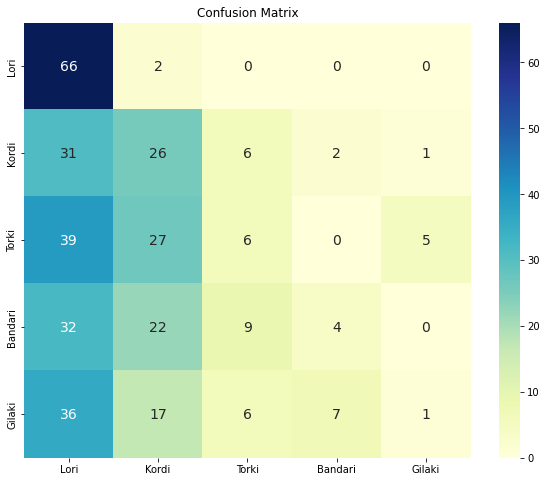

In [ ]:
df_cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap="YlGnBu");
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);
ax.yaxis.set_ticklabels(['Lori', 'Kordi', 'Torki', 'Bandari', 'Gilaki']);